In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Importing Data

In [3]:
data = pd.read_csv('cars24data.csv')

In [4]:
data.head()

,Unnamed: 0,name,selling_price,km_driven,fuel,transmission,owner
0,0,2019 Maruti Swift,"5,34,399","11,404",Petrol,Manual,2nd Owner
1,1,2018 Hyundai Grand i10,"5,46,599","6,875",Petrol,Manual,2nd Owner
2,2,2021 Maruti Swift,"5,55,899","13,174",Petrol,Manual,1st Owner
3,3,2020 Maruti Swift,"5,57,199","16,633",Petrol,Manual,2nd Owner
4,4,2009 Hyundai i10,"1,70,699","45,140",Petrol,Manual,1st Owner


In [5]:
data.shape

(952, 7)

## Exploratory Data Analysis (EDA)

### Checking the type of dataset

In [15]:
data.dtypes

Unnamed: 0         int64
name              object
selling_price    float64
km_driven          int32
fuel              object
transmission      object
owner             object
dtype: object

- We can see, all features are having object data type

In [6]:
data['selling_price'] = data['selling_price'].str.replace(',','')

In [8]:
data['selling_price'] = data['selling_price'].astype(float)

In [11]:
data['km_driven'] = data['km_driven'].str.replace(',','')
data['km_driven'] = data['km_driven'].astype(int)

### Checking Unique values

In [16]:
data.nunique()

Unnamed: 0       952
name             319
selling_price    657
km_driven        947
fuel               3
transmission       2
owner              3
dtype: int64

- We can see, columns are containing multiple unique values.

### Checking Null values

In [17]:
data.isnull().sum()

Unnamed: 0         0
name               0
selling_price    237
km_driven          0
fuel               0
transmission      56
owner              0
dtype: int64

<AxesSubplot:>

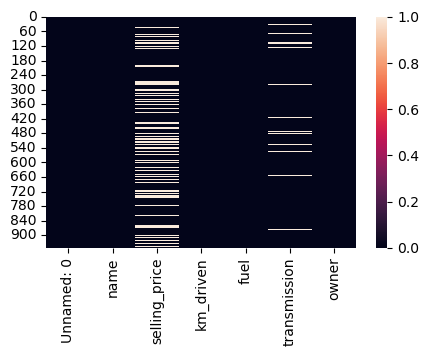

In [18]:
# visualising null values in dataset
plt.figure(figsize=(5,3))
sns.heatmap(data.isnull())

- We can see, selling_price and transmission are havinig some null values.

### Filling Null Values

In [19]:
data['selling_price']= data['selling_price'].fillna(data['selling_price'].median())

In [22]:
data['transmission']= data['transmission'].fillna(data['transmission'].mode()[0])

In [23]:
data.isnull().sum()

Unnamed: 0       0
name             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
dtype: int64

In [25]:
data.drop(columns=['Unnamed: 0'],inplace=True)

## Dataset Description

In [27]:
data.describe()

,selling_price,km_driven
count,952.000000,952.000000
mean,496801.129202,37379.445378
std,127900.056347,24557.585568
min,139099.000000,1122.000000
25%,422074.000000,16614.250000
50%,498299.000000,32272.500000
75%,568599.000000,54477.000000
max,799699.000000,159926.000000


- Big difference between max value and 75% in km_driven indicates presence of outliers.

## Univariate Analysis

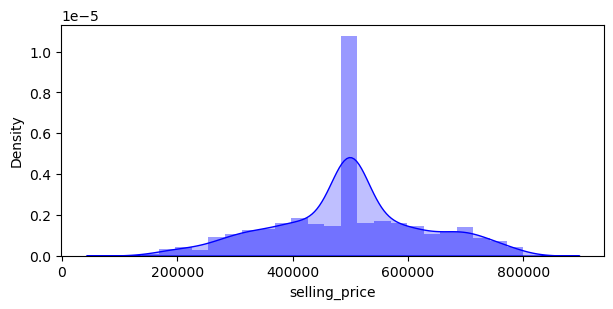

In [32]:
plt.figure(figsize=(7,3))
sns.distplot(data["selling_price"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see selling price is look like that data has normaly distributed.
- We can see, maximum selling price lies in the range of 4 to 6 Lakh.

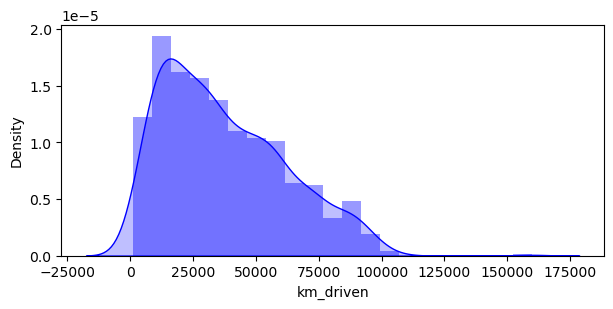

In [33]:
plt.figure(figsize=(7,3))
sns.distplot(data["km_driven"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, km driven has not a normally distributed but maximum data lies in the range of 0 to 100000 km.

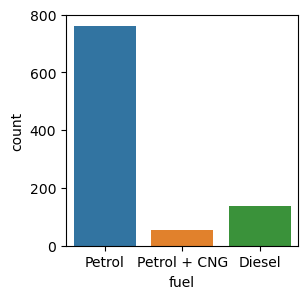

In [35]:
plt.figure(figsize=(3,3))
sns.countplot(x='fuel',data=data)
plt.show()

- We can see, Fuel as petrol has maximum count followed by Diesel.
- Petrol + CNG has lowest count than others.
- It means that maximum people are used petrol vehicle than others. But petrol vehicle are more expensive than others.

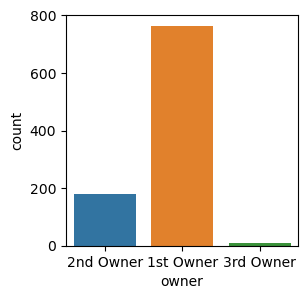

In [40]:
plt.figure(figsize=(3,3))
sns.countplot(x='owner',data=data)
plt.show()

- We can see, Ist Owner owned vehicle are highest for selling followed by 2nd Owner.
- It simple because 1st owner vehicle are having more selling than others.

## Bivariate Analysis

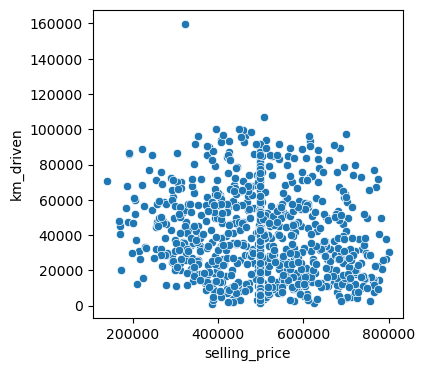

In [41]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='selling_price',y='km_driven',data=data)
plt.show()

- We can see, there are no direct relationship of both feature to each others.
- But the vehicle km_driven are in 0 to 80000km those are having good price. And we can see maximum vehicle km_driven lies in this range.

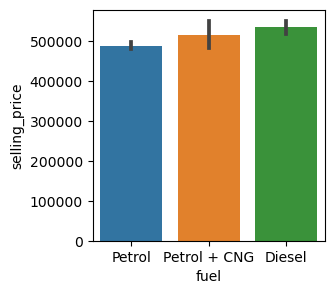

In [42]:
plt.figure(figsize=(3,3))
sns.barplot(x='fuel',y='selling_price',data=data)
plt.show()

- We can see, Diesel vehicles are having maximum selling price than others.
- Whereas petrol vehicles are having lowest selling price than others. But all are having very little difference in their selling price.

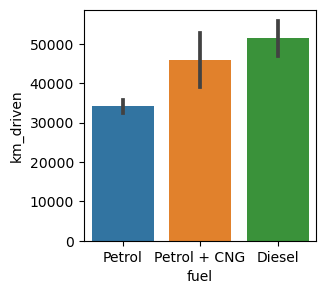

In [43]:
plt.figure(figsize=(3,3))
sns.barplot(x='fuel',y='km_driven',data=data)
plt.show()

- We can see, Diesel cars are having maximum km_driven. It means that, diesel cars runing km is high they used more.
- Petrol cars are having lowest km_driven.
- But here is little contrast that, generaly those cars driven less km they are having high price but here is opposite.

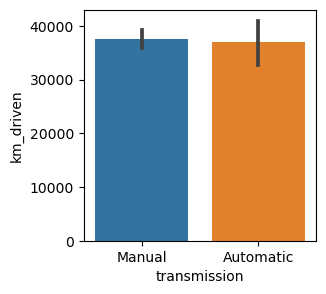

In [45]:
plt.figure(figsize=(3,3))
sns.barplot(x='transmission',y='km_driven',data=data,)
plt.show()

- We can see, manual and automatic both type of transmission are having almost same km_driven.
- But Automatic transmission little lower than Manual transmission cars.

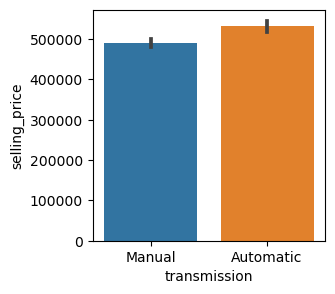

In [46]:
plt.figure(figsize=(3,3))
sns.barplot(x='transmission',y='selling_price',data=data)
plt.show()

- We can see, Automatic transmission cars are having higher selling price than Manual transmission cars.
- But there is no major difference in selling price of both transmission cars. We can see, up to the range 0 to 450000 both are having same price. 

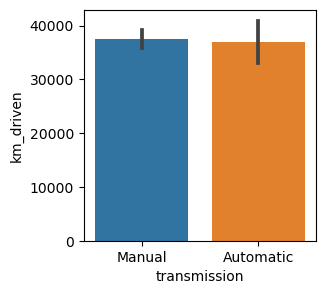

In [47]:
plt.figure(figsize=(3,3))
sns.barplot(x='transmission',y='km_driven',data=data)
plt.show()

- We can see, both transmisson are having almost same km driven.

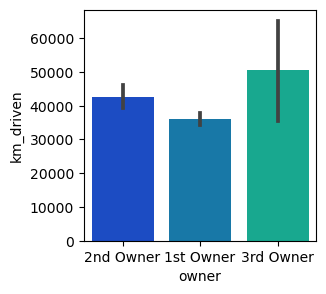

In [48]:
plt.figure(figsize=(3,3))
sns.barplot(x='owner',y='km_driven',data=data,palette='winter')
plt.show()

- We can see, 3rd owner cars are having maximum km_driven. It obviously because these are cars owned by multiple owner and they drive these cars more.
- 1st owner cars are having less km driven.

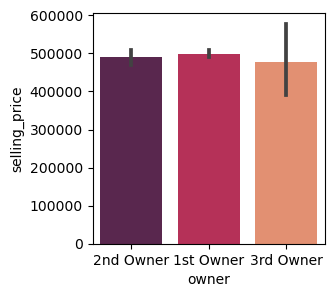

In [49]:
plt.figure(figsize=(3,3))
sns.barplot(x='owner',y='selling_price',data=data,palette='rocket')
plt.show()

- We can see, 1st owner cars are having maximum selling price tna others.
- But all are having almost same range of selling price.

## Multivariate Analysis

In [50]:
data.head()

,name,selling_price,km_driven,fuel,transmission,owner
0,2019 Maruti Swift,534399.0,11404,Petrol,Manual,2nd Owner
1,2018 Hyundai Grand i10,546599.0,6875,Petrol,Manual,2nd Owner
2,2021 Maruti Swift,555899.0,13174,Petrol,Manual,1st Owner
3,2020 Maruti Swift,557199.0,16633,Petrol,Manual,2nd Owner
4,2009 Hyundai i10,170699.0,45140,Petrol,Manual,1st Owner


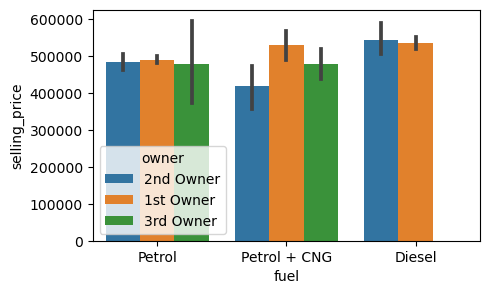

In [55]:
plt.figure(figsize=(5,3))
sns.barplot(x='fuel' ,y='selling_price',hue = 'owner',data=data)
plt.show()

- We can see,In all variants of fuel, 1st owner are having maximum cars selling price than others owner.
- But in Petrol fuel variant, all owner are having almost same selling price there is no major difference in selling price.

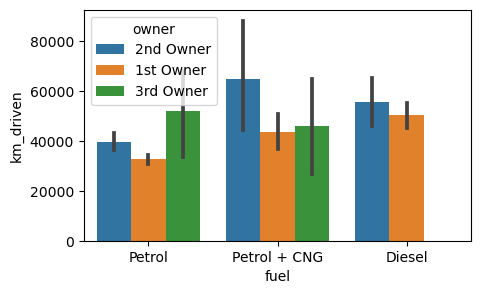

In [57]:
plt.figure(figsize=(5,3))
sns.barplot(x='fuel' ,y='km_driven',hue = 'owner',data=data)
plt.show()

- 2nd owner is top in petrol + CNG and diesel variants of car. It mean in this two variant of fuel in which 2 nd owner are drive a cars maximum km than others.
- But in Ptrol fuel cars, in which 3rd owner cars are having maximum km driven.

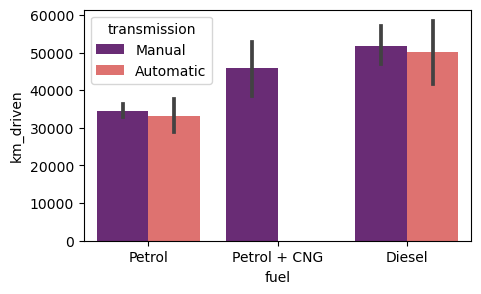

In [58]:
plt.figure(figsize=(5,3))
sns.barplot(x='fuel' ,y='km_driven',hue = 'transmission',data=data, palette='magma')
plt.show()

- We can see,In all fuel type, Manual transmission cars are having maximum km_driven.
- But in Petrol+CNG variants cars, there is Atomatic transmission cars.

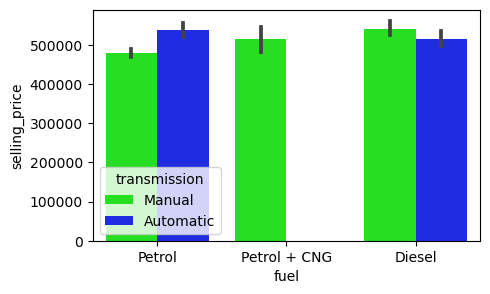

In [59]:
plt.figure(figsize=(5,3))
sns.barplot(x='fuel' ,y='selling_price',hue = 'transmission',data=data, palette='hsv')
plt.show()

- We can see, In Petrol fuel type, In which automatic transmission cars are having maximum selling price than others.
- But petrol+CNG fuel type ,there is no automatic transmission cars.

## Encoding Categorical Columns

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           952 non-null    object 
 1   selling_price  952 non-null    float64
 2   km_driven      952 non-null    int32  
 3   fuel           952 non-null    object 
 4   transmission   952 non-null    object 
 5   owner          952 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 41.0+ KB


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

## Correlation of the features with target column

In [64]:
data.corr()['selling_price'].sort_values()

km_driven       -0.156053
transmission    -0.122763
fuel            -0.079354
owner           -0.030828
name             0.440415
selling_price    1.000000
Name: selling_price, dtype: float64

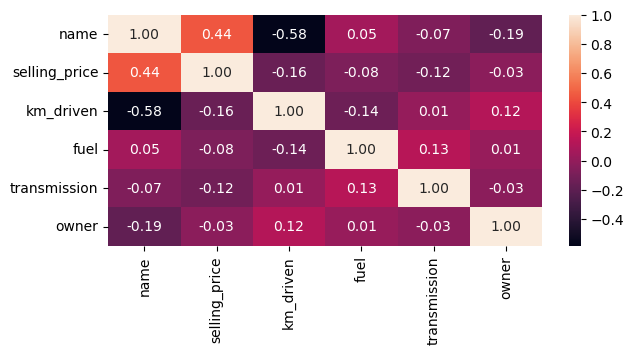

In [69]:
plt.figure(figsize=(7,3))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

- name has 44% positive correlation with target column.
- km_driven has 16% negative correlation with target column.
- fuel has 8% negative correlation with target column.
- transmission has 12% negative correlation with target column.
- owner has 3% negative correlation with target columns.


## Visualizing correlation of feature columns with label column.

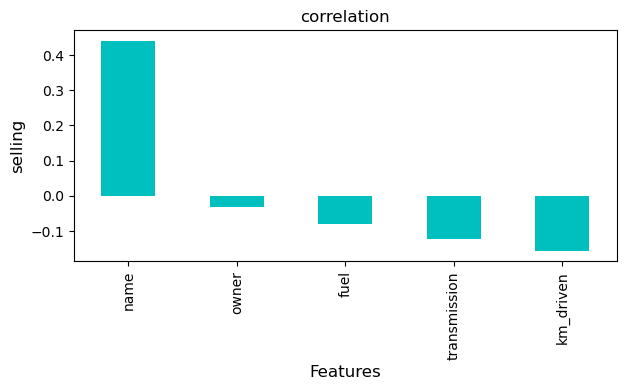

In [72]:
plt.figure(figsize = (7,3))
data.corr()['selling_price'].sort_values(ascending = False).drop(['selling_price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('selling',fontsize=12)
plt.title('correlation',fontsize = 12)
plt.show()

- Name have the strongest positive correlation with Selling Price.
- While km_dricven, transmission, fuel have the strongest negative correlation with Selling Price.

## Checking Outliers

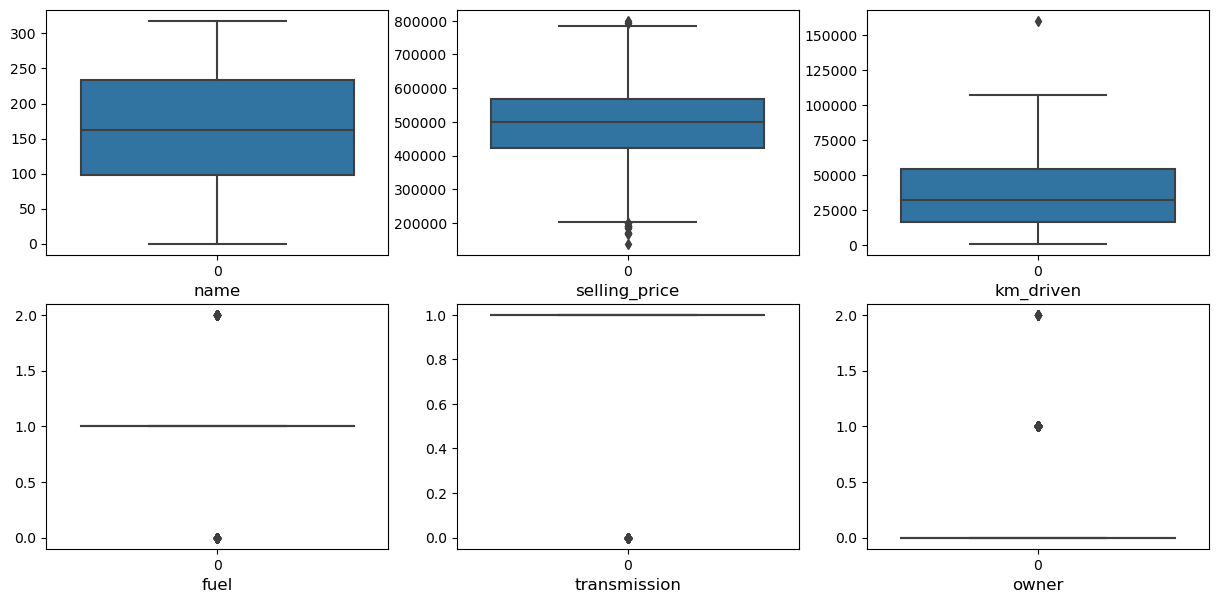

In [86]:
plt.figure(figsize=(15,7))
plotnumber = 1

for column in data:
    if plotnumber <=6:
        plt.subplot(2,3,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber +=1
plt.show()

- We can see, selling price and km_driven are having some outliers.

### Removing Outliers

In [87]:
from scipy.stats import zscore

z_score = zscore(data[['km_driven']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

In [88]:
df.shape

(951, 6)

In [89]:
data.shape

(952, 6)

### Percentage of data loss

In [90]:
data_loss = ((952 - 951)/952*100)
print(data_loss,'%')

0.10504201680672269 %


## Checking Multicollinearity

In [91]:
x = df.drop(columns=['selling_price'],axis=1)
y = df['selling_price']

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif = pd.DataFrame()

In [96]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,name,1.564957
1,km_driven,1.546311
2,fuel,1.037484
3,transmission,1.026349
4,owner,1.039353


- If VIF > 5, It means multicollinearity is present.
- We can see, there is no MultiCollinearity exists in datasets Based on ANOVA F scores.

### Data Before removing Skewness

In [97]:
data.skew()

name            -0.085641
selling_price   -0.053525
km_driven        0.707406
fuel            -0.426149
transmission    -1.850540
owner            1.805936
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65
- Km_driven is having some skewness.
- transmission and owner are having some skewness but tese are a categorical data.

### Data After Removing Skewness

In [98]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [99]:
trans = pd.DataFrame(x)

In [100]:
trans.skew()

0   -0.236686
1   -0.092230
2    0.181257
3   -1.848836
4    1.520607
dtype: float64

In [101]:
x = scaler.fit_transform(x)

In [102]:
x

array([[ 0.50594676, -1.15194174,  0.1479896 ,  0.43786907,  2.01355911],
       [-0.20000035, -1.55568269,  0.1479896 ,  0.43786907,  2.01355911],
       [ 1.37238915, -1.02033138,  0.1479896 ,  0.43786907, -0.49638172],
       ...,
       [-1.22147068,  1.46158147, -1.95127054,  0.43786907, -0.49638172],
       [-0.39825576,  1.71499693, -1.95127054,  0.43786907, -0.49638172],
       [-0.72851   ,  0.88802023, -1.95127054,  0.43786907, -0.49638172]])

## Model Building

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Linear Regression
### Finding Best Random State

In [104]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.32928243359120646 on Random State 105


In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=105)

In [106]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [107]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,89860.304,1.198599e+10,109480.545129,0.329


### Cross - Validation of the model

In [108]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [109]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 16.855127519323293
accuracy_score is:- 34.069082997475334


At cv:- 5
Cross validation score is:- 16.259158175192717
accuracy_score is:- 34.069082997475334


At cv:- 6
Cross validation score is:- 15.471078887020115
accuracy_score is:- 34.069082997475334


At cv:- 7
Cross validation score is:- 18.04443605028853
accuracy_score is:- 34.069082997475334


At cv:- 8
Cross validation score is:- 17.526336158085495
accuracy_score is:- 34.069082997475334


At cv:- 9
Cross validation score is:- 16.751168951789193
accuracy_score is:- 34.069082997475334




In [110]:
lsscore_selected = cross_val_score(lr,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.18044436050288531 
The accuracy score is:  0.3406908299747533


## RandomForest Regressor
### Finding Best Random State

In [111]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.664022980094553 on Random State 542


In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=542)

In [113]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [114]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,59172.31,5.849114e+09,76479.502182,0.633


### Cross - Validation of the model

In [115]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [116]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 46.673356656461806
accuracy_score is:- 65.14786396013046


At cv:- 5
Cross validation score is:- 46.323078437931
accuracy_score is:- 65.14786396013046


At cv:- 6
Cross validation score is:- 48.63362656825655
accuracy_score is:- 65.14786396013046


At cv:- 7
Cross validation score is:- 53.83785794067488
accuracy_score is:- 65.14786396013046


At cv:- 8
Cross validation score is:- 53.42495358398573
accuracy_score is:- 65.14786396013046


At cv:- 9
Cross validation score is:- 52.776514495211735
accuracy_score is:- 65.14786396013046




In [117]:
lsscore_selected = cross_val_score(rf,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.5353572566331872 
The accuracy score is:  0.6514786396013046


## Gradient Boosting Regressor
### Finding Best Random State

In [118]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6128833242011187 on Random State 30


In [119]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=30)

In [120]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [121]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,63310.362,6.953908e+09,83390.095749,0.616


### Cross Validation of the Model

In [122]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [123]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 43.54856016836865
accuracy_score is:- 61.4268252375739


At cv:- 5
Cross validation score is:- 42.369607307845015
accuracy_score is:- 61.4268252375739


At cv:- 6
Cross validation score is:- 43.66046694954064
accuracy_score is:- 61.4268252375739


At cv:- 7
Cross validation score is:- 45.828478228894035
accuracy_score is:- 61.4268252375739


At cv:- 8
Cross validation score is:- 45.3616157244546
accuracy_score is:- 61.4268252375739


At cv:- 9
Cross validation score is:- 45.297572721404855
accuracy_score is:- 61.4268252375739




In [124]:
lsscore_selected = cross_val_score(gbr,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.4580247534879835 
The accuracy score is:  0.614268252375739


## XGBRegressor
### Finding Best Random State

In [125]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6861039395010371 on Random State 90


In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=90)

In [127]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [128]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,52167.006,5.300535e+09,72804.775196,0.686


### Cross-validation of the model

In [129]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [130]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 46.59685942584823
accuracy_score is:- 68.61039395010371


At cv:- 5
Cross validation score is:- 48.999130625931784
accuracy_score is:- 68.61039395010371


At cv:- 6
Cross validation score is:- 47.274640915976775
accuracy_score is:- 68.61039395010371


At cv:- 7
Cross validation score is:- 55.136781748027296
accuracy_score is:- 68.61039395010371


At cv:- 8
Cross validation score is:- 51.980030269951925
accuracy_score is:- 68.61039395010371


At cv:- 9
Cross validation score is:- 53.13968174882427
accuracy_score is:- 68.61039395010371




In [131]:
lsscore_selected = cross_val_score(xgb,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.551367817480273 
The accuracy score is:  0.6861039395010371


## Regularization

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [133]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 10, 'random_state': 0}

In [134]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

24.972222899017915

In [135]:
pred = r2_score(y_test,pred_ls)
pred*100

21.436761446284834

In [136]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

16.859385486345232

## Selection of Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined XGboost Regressor is the best model. It has least difference between accuracy score and cross validation score.

## Hyperparameter tuning

In [139]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [140]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=90)

In [147]:
param = {'learning_rate':[0.1,0.2,0.3],
        'n_estimators':[150,200,300],
        'max_depth':[5,10,15],
        'min_child_weight':[7,9,11],
        'gamma':[0,0.1,0.2,0.3],
        'colsample_bytree':[0.3,0.4,0.5]}

In [148]:
grd = GridSearchCV(xgb,param_grid=param)

In [149]:
grd.fit(X_train,y_train)

grd.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 15,
 'min_child_weight': 9,
 'n_estimators': 300}

In [218]:
xgb = XGBRegressor(colsample_bytree=1, gamma=0, max_depth=6, min_child_weight=1, n_estimators=100,learning_rate=0.3)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

0.6861039395010371

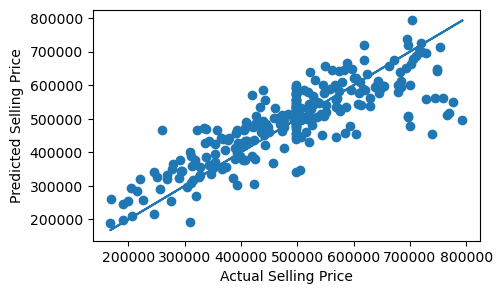

In [220]:
plt.figure(figsize=(5,3))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

## Model Save

In [221]:
import joblib
joblib.dump(xgb,"car_price_prediction.pkl")

['car_price_prediction.pkl']

### Loading The Model

In [222]:
mod=joblib.load("car_price_prediction.pkl")

### Predicting the Selling Price of car

In [223]:
print(mod.predict(x))

[505247.8  508688.62 565316.8  554702.56 179277.72 615746.2  628873.56
 639082.4  290217.3  508320.72 492352.1  496635.62 666270.2  270391.06
 404146.66 572504.25 268726.44 500658.97 259172.34 595106.56 491993.38
 499692.2  590961.   302134.28 504404.75 514221.7  604334.2  724937.9
 496275.34 742477.9  596583.6  793772.5  457253.5  261143.12 511697.53
 457253.5  697010.   600113.44 275317.4  766250.44 651443.56 190787.64
 389142.56 519053.84 543740.9  187674.88 586346.44 499101.62 437522.3
 497497.66 498132.6  604972.06 318435.8  551047.7  650402.4  289433.66
 381667.97 509927.4  496461.88 440487.94 608507.56 514095.03 506498.94
 516997.2  654065.25 285201.8  392083.78 515357.   599626.3  451221.25
 498307.56 376189.3  502381.38 438388.4  268777.38 711850.06 268932.72
 579217.   496580.2  506425.47 219020.27 519644.2  498544.7  255730.77
 264741.88 659197.6  405748.47 501339.1  367508.66 618576.06 562280.2
 497354.22 382474.2  578322.1  193096.53 731969.9  502535.94 503146.5
 543251.5 

In [225]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,505247.81250,534399.0
1,508688.62500,546599.0
2,565316.81250,555899.0
3,554702.56250,557199.0
4,179277.71875,170699.0
5,615746.18750,625999.0
6,628873.56250,631199.0
7,639082.37500,523099.0
8,290217.31250,256699.0
9,508320.71875,509899.0


## Conclusion
- The main component on which the price of a car depends is on cars name, km_driven and the mileage on the car etc.
- The price also depends on which city the car was registered, as some cities have different tax rates and restrictions.